Disclaimer:

    Lisensi Data: Attribution 4.0 International (CC BY 4.0)info
    
    Sumber Data: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/metadata

#### Kelompok 3: Dewi Ulul, Fahrul Isman, Farid Achmad, Fikri Ali

##### Topik: Pendeteksi Gagal Jantung

Problem : dokter susah mendiagnosa gagal jantung

Question/objektif : bagaimana cara prediksi penyakit gagal jantung : Klasifikasi

Measurable outcome / success matrics : tingkat (skor) akurasi di atas 80*

Requirements : seberapa sering dataset di update

users : dokter spesialis dalam

input : umur, diabetes, darah tinggl, kadar garam, dll

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.ensemble import GradientBoostingClassifier as gbcl
from sklearn.ensemble import RandomForestClassifier as ranfor
from sklearn.tree import DecisionTreeClassifier as dcs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate,cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('jantung.csv')
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

Binary Features:

Anaemia (Decrease of Red BLood Cells or Hemoglobin) - 
High blood pressure (Hypertension) - 
Diabetes (If the patient has diabetes) - 
Smoking (If the patient smokes) - 
Sex (Man or Women)

Continuous Features:

Creatinine phosphokinase CPK (Level of the CPK enzyme in the blood in mcg/L) - 
Ejection fraction (Percentage of blood leaving the heart at each contraction) - 
Serum Sodium (Level of Sodium in the blood in mEq/L) - 
Serum Creatinine (Level of Creatininie in the blood in mg/dL) - 
Platelets (Platelets in the blood in kiloplatelets/mL) - 
Time (Follow-up period in Days) - 

Target Class:

Death Event (If the patient died during follow-up period)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

## EDA

Persentase Orang Sakit dan Sehat 
0    203
1     96
Name: DEATH_EVENT, dtype: int64



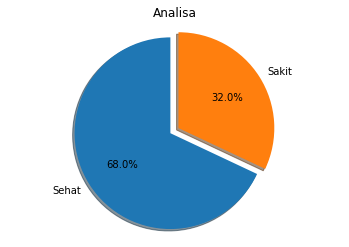

In [12]:
print("Persentase Orang Sakit dan Sehat ")
print(data['DEATH_EVENT'].value_counts())

print("")

classes = dict(data['DEATH_EVENT'].value_counts())
total = sum(classes.values())
alive = round(classes[0]/total, 2)
dead  = round(classes[1]/total, 2)

labels    = 'Sehat', 'Sakit'
sizes     = [alive, dead]
explode   = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.set_title("Analisa")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

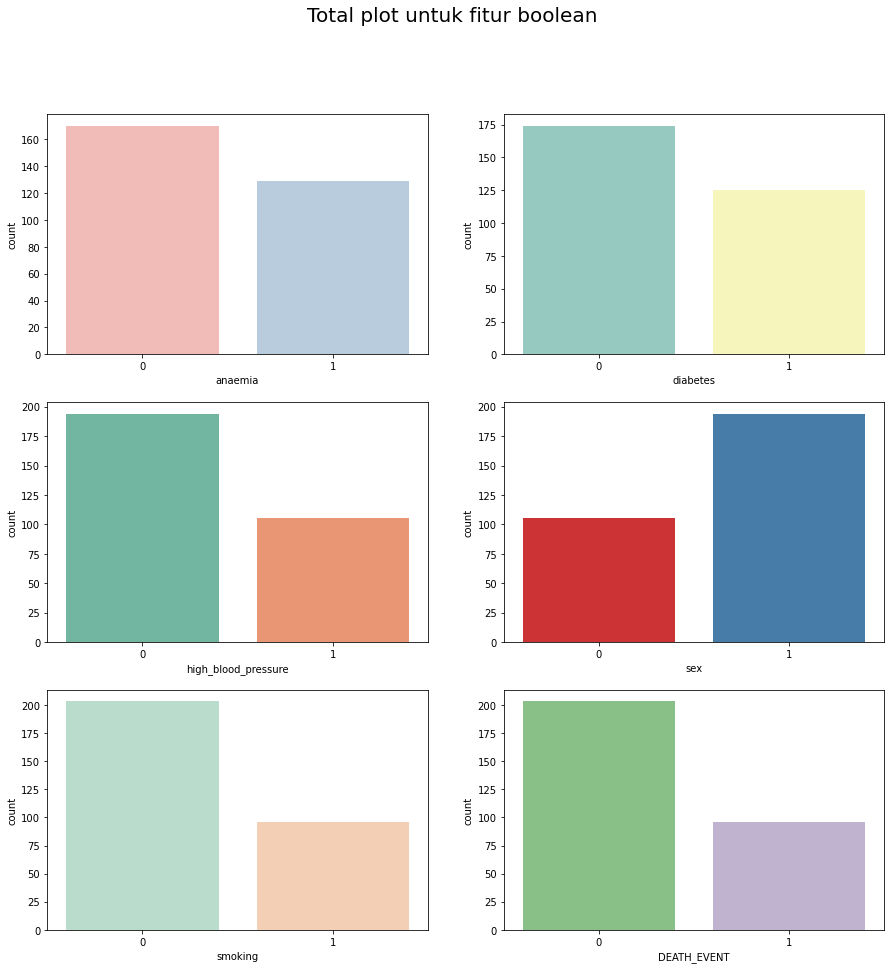

In [9]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
plt.suptitle('Total plot untuk fitur boolean', fontsize=20)

sns.countplot(data['anaemia'], palette='Pastel1', ax=ax[0][0])
sns.countplot(data['diabetes'], palette='Set3', ax=ax[0][1])
sns.countplot(data['high_blood_pressure'], palette='Set2', ax=ax[1][0])
sns.countplot(data['sex'], palette='Set1', ax=ax[1][1])
sns.countplot(data['smoking'], palette='Pastel2', ax=ax[2][0])
sns.countplot(data['DEATH_EVENT'], palette='Accent', ax=ax[2][1])

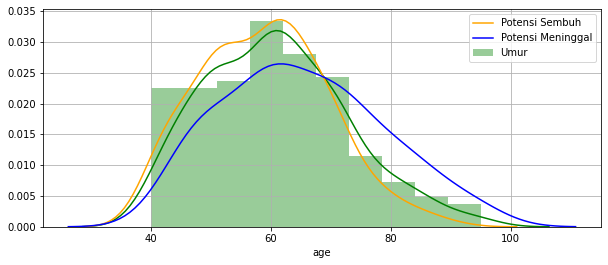

Analisa Umur Dataset :::
Umur Paling Muda 40.000000
Umur Rata Rata 60.833893
Umur Paling Tua 95.000000

Analisa Umur ::: Pasien yang Potensi Sembuh
Umur Paling Muda Pasien Sembuh 40.000000
Umur Rata Rata Pasien Sembuh 58.761906
Umur Paling Tua Pasien Sembuh 90.000000

Analisa Umur ::: Pasien yang Potensi Tambah Parah
Umur Paling Muda Pasien Tambah Parah 42.000000
Umur Rata Rata Pasien Tambah Parah 65.215281
Umur Paling Tua Pasien Tambah Parah 95.000000


In [14]:
age_analysis = data[['age', 'DEATH_EVENT']]

plt.figure(figsize=(10, 4))
sns.distplot(data['age'], hist=True, label='Umur', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['age'], hist=False, label='Potensi Sembuh', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['age'], hist=False, label='Potensi Meninggal', color='blue')
plt.grid()
plt.legend()
plt.show()

print("Analisa Umur Dataset :::")
print("Umur Paling Muda %f"%data['age'].min())
print("Umur Rata Rata %f"%data['age'].mean())
print("Umur Paling Tua %f"%data['age'].max())

print("\nAnalisa Umur ::: Pasien yang Potensi Sembuh")
print("Umur Paling Muda Pasien Sembuh %f"%data[data['DEATH_EVENT']==0]['age'].min())
print("Umur Rata Rata Pasien Sembuh %f"%data[data['DEATH_EVENT']==0]['age'].mean())
print("Umur Paling Tua Pasien Sembuh %f"%data[data['DEATH_EVENT']==0]['age'].max())

print("\nAnalisa Umur ::: Pasien yang Potensi Tambah Parah")
print("Umur Paling Muda Pasien Tambah Parah %f"%data[data['DEATH_EVENT']==1]['age'].min())
print("Umur Rata Rata Pasien Tambah Parah %f"%data[data['DEATH_EVENT']==1]['age'].mean())
print("Umur Paling Tua Pasien Tambah Parah %f"%data[data['DEATH_EVENT']==1]['age'].max())

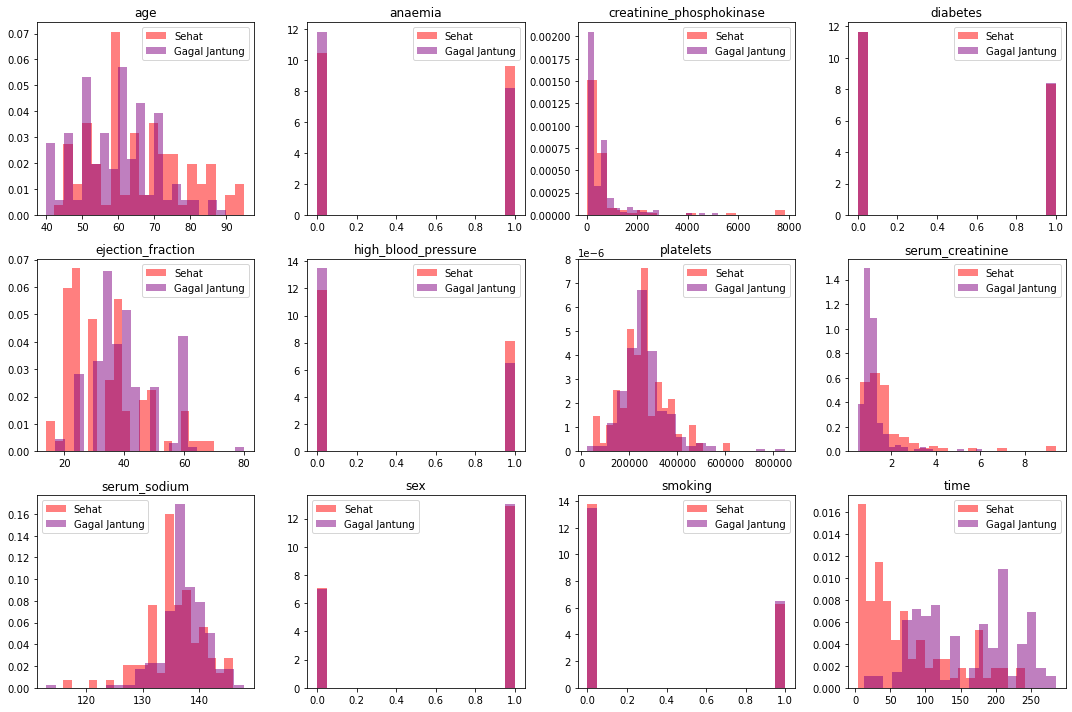

In [39]:
df = data

features = df.columns.drop('DEATH_EVENT')

fig,axes = plt.subplots(3,4, figsize = (15,10))
axes = axes.ravel()
for f,ax in zip(features,axes):
    
    
    ax.hist(df[f][df.DEATH_EVENT==1],label='Sehat',bins=20,density = True,  
                                color ='red', 
                                alpha = 0.5)
    ax.hist(df[f][df.DEATH_EVENT==0],label='Gagal Jantung',bins=20,density = True,  
                                color ='purple',
                                alpha = 0.5)
    
    ax.set_title(f)
    ax.legend()
    
    
fig.tight_layout()    
plt.show()

## TRAIN

In [24]:
from sklearn.linear_model import LogisticRegression as logreg
lr=logreg(max_iter=10000)#, solver='liblinear', C=10.0)
lrr=lr.fit(X_train,y_train)
p1=lrr.predict(X_test)
l1=accuracy_score(y_test,p1)
l2=precision_score(y_test,p1)
l3=recall_score(y_test,p1)

from sklearn.ensemble import GradientBoostingClassifier as gbcl
gbc=gbcl()
gcb=gbc.fit(X_train,y_train)
p2=gcb.predict(X_test)
g1=accuracy_score(y_test,p2)
g2=precision_score(y_test,p2)
g3=recall_score(y_test,p2)

from sklearn.ensemble import RandomForestClassifier as ranfor
rfc=ranfor()
frc=rfc.fit(X_train,y_train)
p3=frc.predict(X_test)
rf1=accuracy_score(y_test,p3)
rf2=precision_score(y_test,p3)
rf3=recall_score(y_test,p3)

from sklearn.svm import SVC
svm=SVC(kernel='linear', C=0.01)
sv=svm.fit(X_train,y_train)
p4=sv.predict(X_test)
sv1=accuracy_score(y_test,p4)
sv2=precision_score(y_test,p4)
sv3=recall_score(y_test,p4)

from sklearn.neighbors import KNeighborsClassifier as kn
#from sklearn import metrics
knn=kn(3).fit(X_train,y_train)
p5=knn.predict(X_test)
kn1=accuracy_score(y_test,p5)
kn2=precision_score(y_test,p5)
kn3=recall_score(y_test,p5)

from sklearn.tree import DecisionTreeClassifier as dcs
dec=dcs(criterion="entropy", max_depth = 6)
de=dec.fit(X_train,y_train)
p6 = de.predict(X_test)
dt1=accuracy_score(y_test,p6)
dt2=precision_score(y_test,p6)
dt3=recall_score(y_test,p6)

# 0. Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression as logreg
lr=logreg(max_iter=10000)#, solver='liblinear', C=10.0)
lrr=lr.fit(X_train,y_train)
p1=lrr.predict(X_test)
l1=accuracy_score(y_test,p1)
l2=precision_score(y_test,p1)
l3=recall_score(y_test,p1)
print("Linear Regression Accuracy Rate :", "{:.2f}%".format(100*l1))
print("Linear Regression Precision Rate :", "{:.2f}%".format(100*l2))
print("Linear Regression Recall Rate :", "{:.2f}%".format(100*l3))

Linear Regression Accuracy Rate : 88.33%
Linear Regression Precision Rate : 76.92%
Linear Regression Recall Rate : 71.43%


In [5]:
print(lrr.intercept_)
print(lrr.coef_)

[0.00019658]
[[ 2.72938364e-02 -2.80413174e-05  1.64625053e-04  4.99347076e-04
  -3.62357732e-02 -2.47535334e-04 -3.07959838e-06  4.70209781e-03
   1.28653152e-02 -5.33522770e-06 -1.34886864e-04 -1.80712871e-02]]


# 1. Gradient Booster

In [6]:
from sklearn.ensemble import GradientBoostingClassifier as gbcl
gbc=gbcl()
gcb=gbc.fit(X_train,y_train)
p2=gcb.predict(X_test)
g1=accuracy_score(y_test,p2)
g2=precision_score(y_test,p2)
g3=recall_score(y_test,p2)
print("Gradient Booster Classifier Accuracy Rate :", "{:.2f}%".format(100*g1))
print("Gradient Booster Classifier Precision Rate :", "{:.2f}%".format(100*g2))
print("Gradient Booster Classifier Recall Rate :", "{:.2f}%".format(100*g3))

Gradient Booster Classifier Accuracy Rate : 81.67%
Gradient Booster Classifier Precision Rate : 58.82%
Gradient Booster Classifier Recall Rate : 71.43%


# 2. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier as ranfor
rfc=ranfor()
frc=rfc.fit(X_train,y_train)
p3=frc.predict(X_test)
rf1=accuracy_score(y_test,p3)
rf2=precision_score(y_test,p3)
rf3=recall_score(y_test,p3)
print("Random Forest Classifier Accuracy Rate :", "{:.2f}%".format(100*rf1))
print("Random Forest Classifier Precision Rate :", "{:.2f}%".format(100*rf2))
print("Random Forest Classifier Recall Rate :", "{:.2f}%".format(100*rf3))

Random Forest Classifier Accuracy Rate : 88.33%
Random Forest Classifier Precision Rate : 81.82%
Random Forest Classifier Recall Rate : 64.29%


# 3. Support Vector Machine

In [16]:
from sklearn.svm import SVC
svm=SVC()
sv=svm.fit(X_train,y_train)
p4=sv.predict(X_test)
sv1=accuracy_score(y_test,p4)
sv2=precision_score(y_test,p4)
sv3=recall_score(y_test,p4)
print("Support Vector Machine Accuracy Rate :", "{:.2f}%".format(100*sv1))
#print("Support Vector Machine Precision Rate :", "{:.2f}%".format(100*sv2))
#print("Support Vector Machine Recall Rate :", "{:.2f}%".format(100*sv3))

Support Vector Machine Accuracy Rate : 76.67%


In [10]:
print(classification_report(y_test, p4))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

   micro avg       0.77      0.77      0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



# 4. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier as kn
#from sklearn import metrics
knn=kn(4).fit(X_train,y_train)
p5=knn.predict(X_test)
kn1=accuracy_score(y_test,p5)
kn2=precision_score(y_test,p5)
kn3=recall_score(y_test,p5)
print("Support Vector Machine Accuracy Rate :", "{:.2f}%".format(100*kn1))
#print("Support Vector Machine Precision Rate :", "{:.2f}%".format(100*kn2))
#print("Support Vector Machine Recall Rate :", "{:.2f}%".format(100*kn3))
"""
print('Trainset Accuracy:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Trainset Presisi:', metrics.precision_score(y_train, knn.predict(X_train)))
print('Trainset Recall:', metrics.recall_score(y_train, knn.predict(X_train)))
"""

Support Vector Machine Accuracy Rate : 70.00%


"\nprint('Trainset Accuracy:', metrics.accuracy_score(y_train, knn.predict(X_train)))\nprint('Trainset Presisi:', metrics.precision_score(y_train, knn.predict(X_train)))\nprint('Trainset Recall:', metrics.recall_score(y_train, knn.predict(X_train)))\n"

# 5. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier as dcs
dec=dcs(criterion="entropy", max_depth = 4)
de=dec.fit(X_train,y_train)
p6 = de.predict(X_test)
dt1=accuracy_score(y_test,p6)
dt2=precision_score(y_test,p6)
dt3=recall_score(y_test,p6)
print("Support Vector Machine Accuracy Rate :", "{:.2f}%".format(100*dt1))
print("Support Vector Machine Precision Rate :", "{:.2f}%".format(100*dt2))
print("Support Vector Machine Recall Rate :", "{:.2f}%".format(100*dt3))

Support Vector Machine Accuracy Rate : 83.33%
Support Vector Machine Precision Rate : 60.00%
Support Vector Machine Recall Rate : 85.71%


In [11]:
print(data.columns)
print('age min',data.age.min())
print('age max',data.age.max())
print('enzime min',data.creatinine_phosphokinase.min())
print('enzime max',data.creatinine_phosphokinase.max())
print('aliran arteri min:',data.ejection_fraction.min())
print('aliran arteri max',data.ejection_fraction.max())
print('trombosit min',data.platelets.min())
print('trombosit max',data.platelets.max())
print('zat limbah di darah min',data.serum_creatinine.min())
print('zat limbah di darah max',data.serum_creatinine.max())
print('kadar garam min',data.serum_sodium.min())
print('kadar garam max',data.serum_sodium.max())
print('Seberapa sering ke dokter min',data.time.min())
print('seberapa sering ke dokter max',data.time.max())

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
age min 40.0
age max 95.0
enzime min 23
enzime max 7861
aliran arteri min: 14
aliran arteri max 80
trombosit min 25100.0
trombosit max 850000.0
zat limbah di darah min 0.5
zat limbah di darah max 9.4
kadar garam min 113
kadar garam max 148
Seberapa sering ke dokter min 4
seberapa sering ke dokter max 285


### Pemanggilan fungsi akurasi, presisi, recall

In [3]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro')}

In [9]:
#lrr(lr),gcb(gbc),frc(rfc),sv(svm),knn(kn(4),de(dec)
con_data = np.array([40, 0, 23, 0, 14, 0, 25100, 0.5, 113, 0, 0, 50])
data_pred = lrr.predict(con_data.reshape(1,-11))
if (data_pred == [1]):
    print("Sistem Mendeteksi Bermasalah, Cek Ke Dokter")
else:
    print ("In sha ALLAH Sehat")
print(type(data_pred))

Sistem Mendeteksi Bermasalah, Cek Ke Dokter
<class 'numpy.ndarray'>


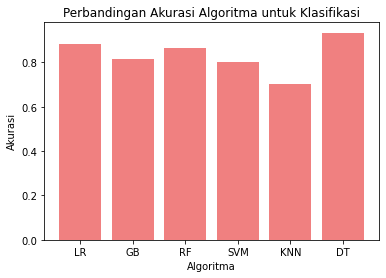

Akurasi Logistic Regression: 88.33333333333333 %
Akurasi Gradient Booster: 81.66666666666667 %
Akurasi Random Forest: 86.66666666666667 %
Akurasi Support Vector Machine: 80.0 %
Akurasi K-Nearest Neighbors: 70.0 %
Akurasi Decision Tree: 93.33333333333333 %


In [35]:
x = ['LR','GB','RF','SVM','KNN','DT']
npm = np.array([l1,g1,rf1,sv1,kn1,dt1])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightcoral')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()
print('Akurasi Logistic Regression:', l1*100,'%')
print('Akurasi Gradient Booster:', g1*100,'%')
print('Akurasi Random Forest:', rf1*100,'%')
print('Akurasi Support Vector Machine:', sv1*100,'%')
print('Akurasi K-Nearest Neighbors:', kn1*100,'%')
print('Akurasi Decision Tree:', dt1*100,'%')

#### KFOLD 2

In [5]:
k_fold2 = KFold(n_splits=2)
log = cross_validate(lr, X, y, cv=k_fold2, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold2, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold2, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold2, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold2, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu2 = log['test_accuracy'].mean()*100
logpre2 = log['test_precision'].mean()*100
logrec2 = log['test_recall'].mean()*100
###
graacu2 = gra['test_accuracy'].mean()*100
grapre2 = gra['test_precision'].mean()*100
grarec2 = gra['test_recall'].mean()*100
###
rfacu2 = rf['test_accuracy'].mean()*100
rfpre2 = rf['test_precision'].mean()*100
rfrec2 = rf['test_recall'].mean()*100
###
desacu2 = des['test_accuracy'].mean()*100
despre2 = des['test_precision'].mean()*100
desrec2 = des['test_recall'].mean()*100

logistic accuracy :  83.2841163310962 logistic presisi : 82.03332797082797 logistic recall :  78.94246740216433
gradient accuracy :  79.25055928411633 gradient presisi :  76.57856891104313 gradient recall :  75.92062274197016
random forest accuracy :  80.25950782997762 random forest presisi :  78.65993522916274 random forest recall :  74.97171797866018
decision accuracy :  80.59284116331096 decision presisi :  78.65026634242372 decision recall :  76.05303340092493


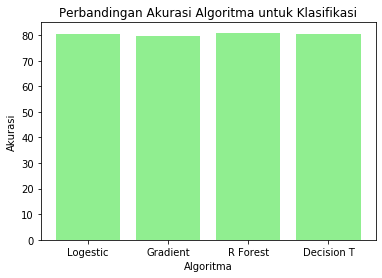

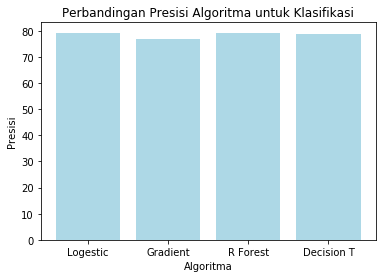

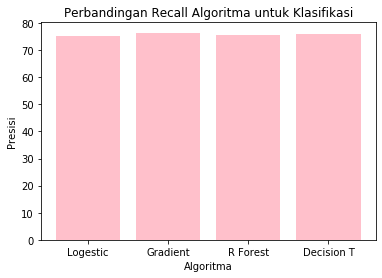

In [39]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu2,graacu2,rfacu2,desacu2])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre2,grapre2,rfpre2,despre2])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec2,grarec2,rfrec2,desrec2])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 3

In [6]:
k_fold3 = KFold(n_splits=3)
log = cross_validate(lr, X, y, cv=k_fold3, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold3, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold3, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold3, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold3, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu3 = log['test_accuracy'].mean()*100
logpre3 = log['test_precision'].mean()*100
logrec3 = log['test_recall'].mean()*100
###
graacu3 = gra['test_accuracy'].mean()*100
grapre3 = gra['test_precision'].mean()*100
grarec3 = gra['test_recall'].mean()*100
###
rfacu3 = rf['test_accuracy'].mean()*100
rfpre3 = rf['test_precision'].mean()*100
rfrec3 = rf['test_recall'].mean()*100
###
desacu3 = des['test_accuracy'].mean()*100
despre3 = des['test_precision'].mean()*100
desrec3 = des['test_recall'].mean()*100

logistic accuracy :  83.60942760942761 logistic presisi : 81.90849574470263 logistic recall :  79.37861362493717
gradient accuracy :  82.91919191919192 gradient presisi :  81.18597575941064 gradient recall :  79.27303293112118
random forest accuracy :  82.25925925925925 random forest presisi :  80.69091100077016 random forest recall :  77.35756482080012
decision accuracy :  81.58249158249158 decision presisi :  81.1622811111682 decision recall :  77.09170527185233


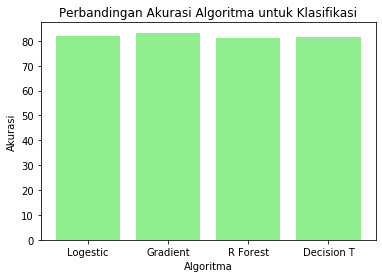

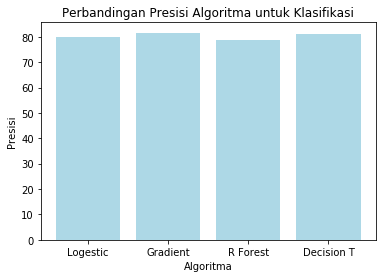

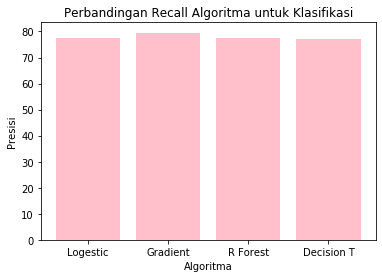

In [40]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu3,graacu3,rfacu3,desacu3])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre3,grapre3,rfpre3,despre3])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec3,grarec3,rfrec3,desrec3])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 4

In [7]:
k_fold4 = KFold(n_splits=4)
log = cross_validate(lr, X, y, cv=k_fold4, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold4, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold4, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold4, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold4, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu4 = log['test_accuracy'].mean()*100
logpre4 = log['test_precision'].mean()*100
logrec4 = log['test_recall'].mean()*100
###
graacu4 = gra['test_accuracy'].mean()*100
grapre4 = gra['test_precision'].mean()*100
grarec4 = gra['test_recall'].mean()*100
###
rfacu4 = rf['test_accuracy'].mean()*100
rfpre4 = rf['test_precision'].mean()*100
rfrec4 = rf['test_recall'].mean()*100
###
desacu4 = des['test_accuracy'].mean()*100
despre4 = des['test_precision'].mean()*100
desrec4 = des['test_recall'].mean()*100

logistic accuracy :  80.27927927927928 logistic presisi : 78.77684658794466 logistic recall :  75.28040633946748
gradient accuracy :  80.92792792792793 gradient presisi :  78.50153591311656 gradient recall :  77.70193046423498
random forest accuracy :  78.9054054054054 random forest presisi :  75.857336640092 random forest recall :  73.23862434111383
decision accuracy :  78.59009009009009 decision presisi :  75.40690548327848 decision recall :  75.50773988206704


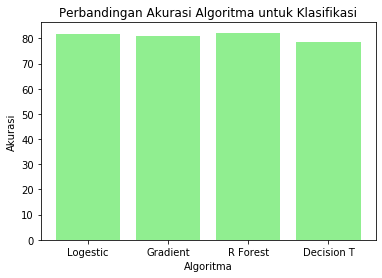

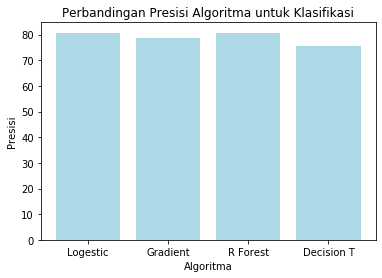

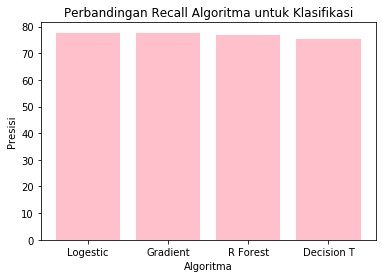

In [41]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu4,graacu4,rfacu4,desacu4])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre4,grapre4,rfpre4,despre4])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec4,grarec4,rfrec4,desrec4])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 5

In [8]:
k_fold5 = KFold(n_splits=5)
log = cross_validate(lr, X, y, cv=k_fold5, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold5, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold5, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold5, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold5, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)


logacu5 = log['test_accuracy'].mean()*100
logpre5 = log['test_precision'].mean()*100
logrec5 = log['test_recall'].mean()*100
###
graacu5 = gra['test_accuracy'].mean()*100
grapre5 = gra['test_precision'].mean()*100
grarec5 = gra['test_recall'].mean()*100
###
rfacu5 = rf['test_accuracy'].mean()*100
rfpre5 = rf['test_precision'].mean()*100
rfrec5 = rf['test_recall'].mean()*100
###
desacu5 = des['test_accuracy'].mean()*100
despre5 = des['test_precision'].mean()*100
desrec5 = des['test_recall'].mean()*100

logistic accuracy :  83.26553672316385 logistic presisi : 80.90352374139212 logistic recall :  78.72982420187388
gradient accuracy :  82.60451977401131 gradient presisi :  79.03847333464059 gradient recall :  78.06010021072133
random forest accuracy :  84.61581920903954 random forest presisi :  83.43257577664434 random forest recall :  78.87836923395929
decision accuracy :  80.24293785310735 decision presisi :  77.72598767324119 decision recall :  76.20247009532723


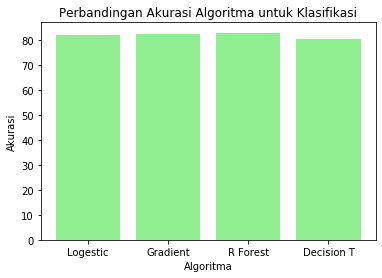

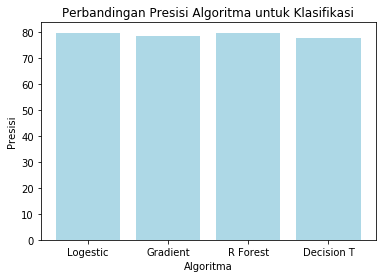

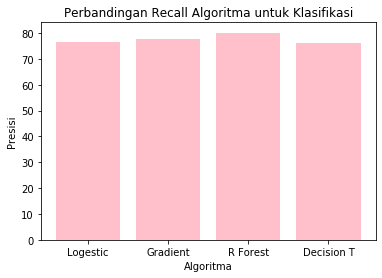

In [42]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu5,graacu5,rfacu5,desacu5])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre5,grapre5,rfpre5,despre5])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec5,grarec5,rfrec5,desrec5])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 6

In [9]:
k_fold6 = KFold(n_splits=6)
log = cross_validate(lr, X, y, cv=k_fold6, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold6, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold6, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold6, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold6, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu6 = log['test_accuracy'].mean()*100
logpre6 = log['test_precision'].mean()*100
logrec6 = log['test_recall'].mean()*100
###
graacu6 = gra['test_accuracy'].mean()*100
grapre6 = gra['test_precision'].mean()*100
grarec6 = gra['test_recall'].mean()*100
###
rfacu6 = rf['test_accuracy'].mean()*100
rfpre6 = rf['test_precision'].mean()*100
rfrec6 = rf['test_recall'].mean()*100
###
desacu6 = des['test_accuracy'].mean()*100
despre6 = des['test_precision'].mean()*100
desrec6 = des['test_recall'].mean()*100

logistic accuracy :  82.9455782312925 logistic presisi : 80.99682827624002 logistic recall :  77.23373369925093
gradient accuracy :  83.61224489795917 gradient presisi :  80.66832078626067 gradient recall :  79.5692493968356
random forest accuracy :  82.59863945578232 random forest presisi :  79.69176828548962 random forest recall :  77.90651876858773
decision accuracy :  81.59863945578233 decision presisi :  78.61546754090614 decision recall :  74.88475764337834


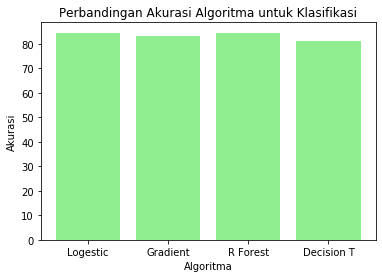

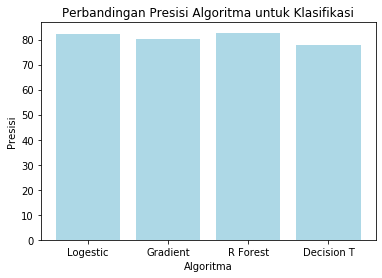

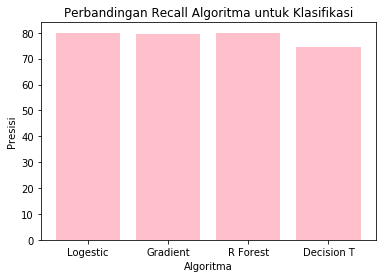

In [43]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu6,graacu6,rfacu6,desacu6])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre6,grapre6,rfpre6,despre6])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec6,grarec6,rfrec6,desrec6])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 7

In [10]:
k_fold7 = KFold(n_splits=7)
log = cross_validate(lr, X, y, cv=k_fold7, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold7, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold7, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold7, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold7, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu7 = log['test_accuracy'].mean()*100
logpre7 = log['test_precision'].mean()*100
logrec7 = log['test_recall'].mean()*100
###
graacu7 = gra['test_accuracy'].mean()*100
grapre7 = gra['test_precision'].mean()*100
grarec7 = gra['test_recall'].mean()*100
###
rfacu7 = rf['test_accuracy'].mean()*100
rfpre7 = rf['test_precision'].mean()*100
rfrec7 = rf['test_recall'].mean()*100
###
desacu7 = des['test_accuracy'].mean()*100
despre7 = des['test_precision'].mean()*100
desrec7 = des['test_recall'].mean()*100

logistic accuracy :  81.2687865844012 logistic presisi : 78.49548205486701 logistic recall :  76.06827342888587
gradient accuracy :  81.59310235722195 gradient presisi :  77.84635141935563 gradient recall :  78.18349413259155
random forest accuracy :  82.59769023888624 random forest presisi :  80.56320484955101 random forest recall :  76.28711632309455
decision accuracy :  81.25296630280019 decision presisi :  78.21780378818195 decision recall :  77.31265563281443


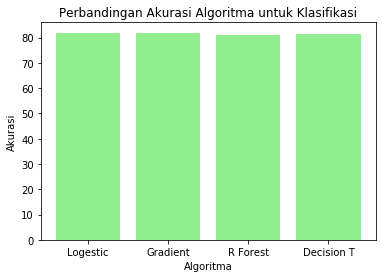

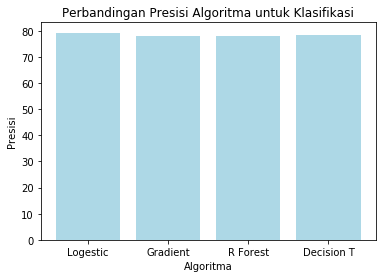

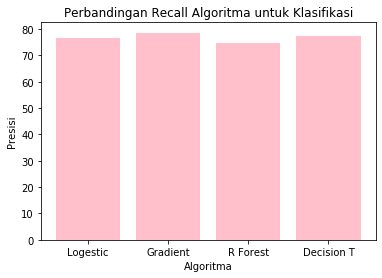

In [44]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu7,graacu7,rfacu7,desacu7])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre7,grapre7,rfpre7,despre7])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec7,grarec7,rfrec7,desrec7])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 8

In [11]:
k_fold8 = KFold(n_splits=8)
log = cross_validate(lr, X, y, cv=k_fold8, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold8, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold8, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold8, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold8, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu8 = log['test_accuracy'].mean()*100
logpre8 = log['test_precision'].mean()*100
logrec8 = log['test_recall'].mean()*100
###
graacu8 = gra['test_accuracy'].mean()*100
grapre8 = gra['test_precision'].mean()*100
grarec8 = gra['test_recall'].mean()*100
###
rfacu8 = rf['test_accuracy'].mean()*100
rfpre8 = rf['test_precision'].mean()*100
rfrec8 = rf['test_recall'].mean()*100
###
desacu8 = des['test_accuracy'].mean()*100
despre8 = des['test_precision'].mean()*100
desrec8 = des['test_recall'].mean()*100

logistic accuracy :  82.574679943101 logistic presisi : 81.39172903046826 logistic recall :  77.26575583233192
gradient accuracy :  81.22332859174965 gradient presisi :  77.96275064573628 gradient recall :  76.18512601528906
random forest accuracy :  82.92140825035561 random forest presisi :  81.91476651783998 random forest recall :  76.56944221991778
decision accuracy :  79.90753911806543 decision presisi :  78.6618979978355 decision recall :  73.95005074183064


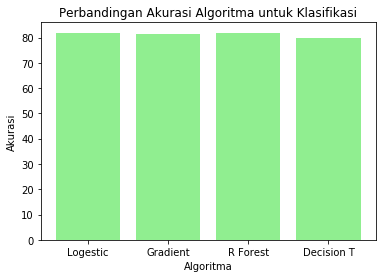

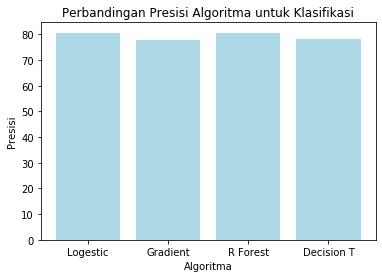

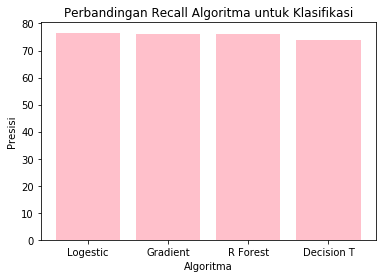

In [45]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu8,graacu8,rfacu8,desacu8])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre8,grapre8,rfpre8,despre8])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec8,grarec8,rfrec8,desrec8])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 9

In [12]:
k_fold9 = KFold(n_splits=9)
log = cross_validate(lr, X, y, cv=k_fold9, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold9, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold9, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold9, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold9, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu9 = log['test_accuracy'].mean()*100
logpre9 = log['test_precision'].mean()*100
logrec9 = log['test_recall'].mean()*100
###
graacu9 = gra['test_accuracy'].mean()*100
grapre9 = gra['test_precision'].mean()*100
grarec9 = gra['test_recall'].mean()*100
###
rfacu9 = rf['test_accuracy'].mean()*100
rfpre9 = rf['test_precision'].mean()*100
rfrec9 = rf['test_recall'].mean()*100
###
desacu9 = des['test_accuracy'].mean()*100
despre9 = des['test_precision'].mean()*100
desrec9 = des['test_recall'].mean()*100

logistic accuracy :  82.24400871459694 logistic presisi : 79.53603155039937 logistic recall :  76.83790108726171
gradient accuracy :  81.87759952465835 gradient presisi :  77.49871533695062 gradient recall :  76.8411441223675
random forest accuracy :  82.91740938799764 random forest presisi :  80.34871071790113 random forest recall :  77.21714869466362
decision accuracy :  81.25371360665477 decision presisi :  79.38039653079501 decision recall :  76.5341716041844


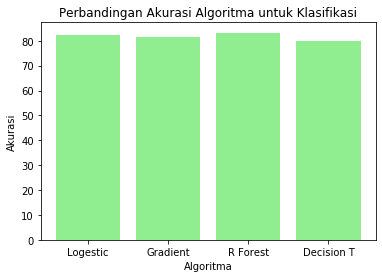

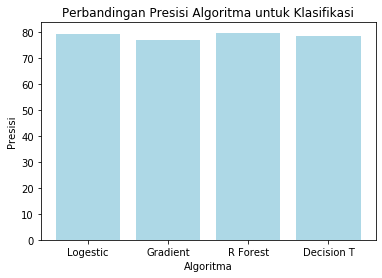

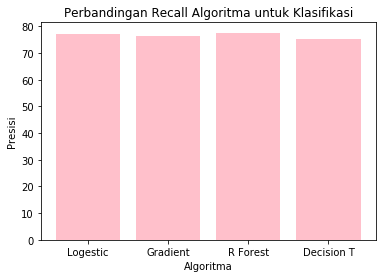

In [46]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu9,graacu9,rfacu9,desacu9])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre9,grapre9,rfpre9,despre9])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec9,grarec9,rfrec9,desrec9])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# KFOLD 10

In [13]:
k_fold10 = KFold(n_splits=10)
log = cross_validate(lr, X, y, cv=k_fold10, scoring=scoring)
#svm = cross_validate(svmclas, X, y, cv=k_fold10, scoring=scoring)
gra = cross_validate(gbc, X, y, cv=k_fold10, scoring=scoring)
rf = cross_validate(rfc, X, y, cv=k_fold10, scoring=scoring)
des = cross_validate(dec, X, y, cv=k_fold10, scoring=scoring)
print('logistic accuracy : ',log['test_accuracy'].mean()*100,'logistic presisi :',log['test_precision'].mean()*100,
     'logistic recall : ',log['test_recall'].mean()*100)
#print('svm accuracy : ',svm['test_accuracy'].mean()*100,'svm presisi : ',svm['test_precision'].mean()*100,
#     'svm recall : ',svm['test_recall'].mean()*100)
print('gradient accuracy : ',gra['test_accuracy'].mean()*100,'gradient presisi : ',gra['test_precision'].mean()*100,
     'gradient recall : ',gra['test_recall'].mean()*100)
print('random forest accuracy : ',rf['test_accuracy'].mean()*100,'random forest presisi : ',rf['test_precision'].mean()*100,
     'random forest recall : ',rf['test_recall'].mean()*100)
print('decision accuracy : ',des['test_accuracy'].mean()*100,'decision presisi : ',des['test_precision'].mean()*100,
     'decision recall : ',des['test_recall'].mean()*100)

logacu10 = log['test_accuracy'].mean()*100
logpre10 = log['test_precision'].mean()*100
logrec10 = log['test_recall'].mean()*100
###
graacu10 = gra['test_accuracy'].mean()*100
grapre10 = gra['test_precision'].mean()*100
grarec10 = gra['test_recall'].mean()*100
###
rfacu10 = rf['test_accuracy'].mean()*100
rfpre10 = rf['test_precision'].mean()*100
rfrec10 = rf['test_recall'].mean()*100
###
desacu10 = des['test_accuracy'].mean()*100
despre10 = des['test_precision'].mean()*100
desrec10 = des['test_recall'].mean()*100

logistic accuracy :  82.91954022988506 logistic presisi : 80.03774765788496 logistic recall :  77.94763650410104
gradient accuracy :  82.95402298850574 gradient presisi :  79.98236917880881 gradient recall :  78.82421357881884
random forest accuracy :  83.58620689655172 random forest presisi :  81.01910866910866 random forest recall :  79.2638878696945
decision accuracy :  82.24137931034484 decision presisi :  81.09044946281789 decision recall :  76.85374486624487


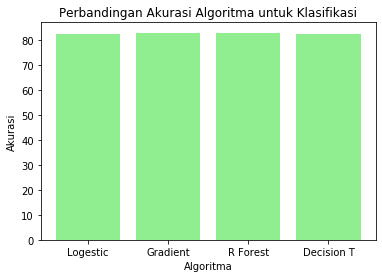

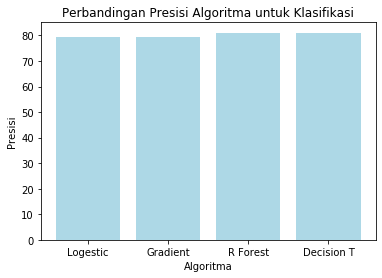

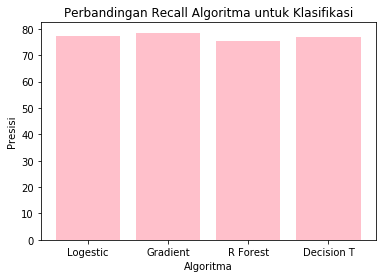

In [47]:
x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logacu10,graacu10,rfacu10,desacu10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightgreen')
plt.xlabel("Algoritma")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logpre10,grapre10,rfpre10,despre10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

x = ['Logestic','Gradient','R Forest','Decision T']
npm = np.array([logrec10,grarec10,rfrec2,desrec10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='pink')
plt.xlabel("Algoritma")
plt.ylabel("Presisi")
plt.title("Perbandingan Recall Algoritma untuk Klasifikasi")
plt.xticks(x_pos, x)
plt.show()

# VISUALISAI PER ALGORITMA

#### Logestic Regression

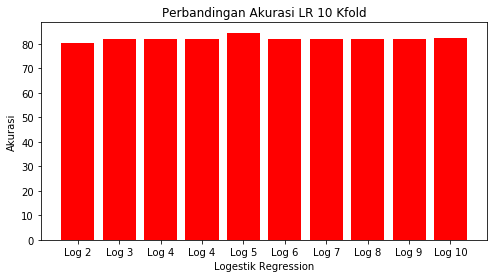

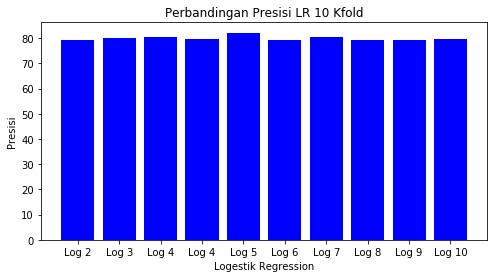

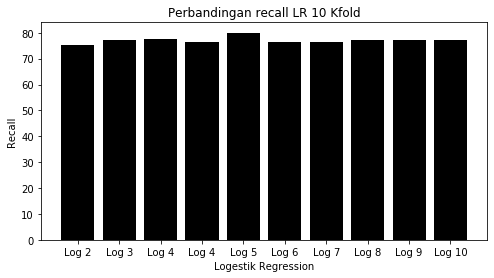

In [73]:
fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Log 2','Log 3','Log 4','Log 4','Log 5','Log 6','Log 7','Log 8','Log 9','Log 10']
npm = np.array([logacu2,logacu3,logacu4,logacu5,logacu6,logacu7,logacu8,logacu9,logacu9,logacu10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='red')
plt.xlabel("Logestik Regression")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi LR 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Log 2','Log 3','Log 4','Log 4','Log 5','Log 6','Log 7','Log 8','Log 9','Log 10']
npm = np.array([logpre2,logpre3,logpre4,logpre5,logpre6,logpre7,logpre8,logpre9,logpre9,logpre10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='blue')
plt.xlabel("Logestik Regression")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi LR 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Log 2','Log 3','Log 4','Log 4','Log 5','Log 6','Log 7','Log 8','Log 9','Log 10']
npm = np.array([logrec2,logrec3,logrec4,logrec5,logrec6,logrec7,logrec8,logrec9,logrec9,logrec10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='black')
plt.xlabel("Logestik Regression")
plt.ylabel("Recall")
plt.title("Perbandingan recall LR 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

#### Gradient Booster

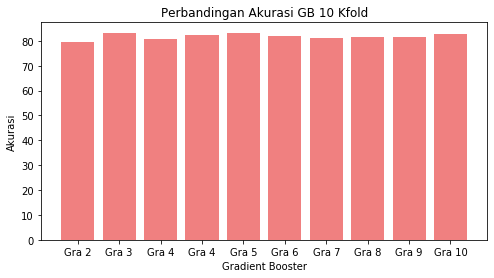

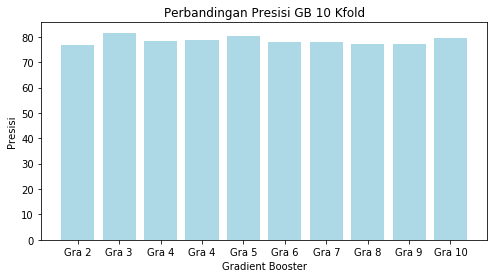

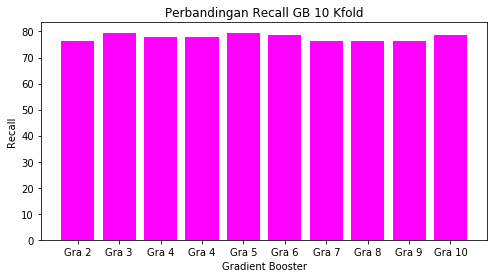

In [75]:
fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Gra 2','Gra 3','Gra 4','Gra 4','Gra 5','Gra 6','Gra 7','Gra 8','Gra 9','Gra 10']
npm = np.array([graacu2,graacu3,graacu4,graacu5,graacu6,graacu7,graacu8,graacu9,graacu9,graacu10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightcoral')
plt.xlabel("Gradient Booster")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi GB 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Gra 2','Gra 3','Gra 4','Gra 4','Gra 5','Gra 6','Gra 7','Gra 8','Gra 9','Gra 10']
npm = np.array([grapre2,grapre3,grapre4,grapre5,grapre6,grapre7,grapre8,grapre9,grapre9,grapre10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='lightblue')
plt.xlabel("Gradient Booster")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi GB 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['Gra 2','Gra 3','Gra 4','Gra 4','Gra 5','Gra 6','Gra 7','Gra 8','Gra 9','Gra 10']
npm = np.array([grarec2,grarec3,grarec4,grarec5,grarec6,grarec7,grarec8,grarec9,grarec9,grarec10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='magenta')
plt.xlabel("Gradient Booster")
plt.ylabel("Recall")
plt.title("Perbandingan Recall GB 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

#### Random Forest

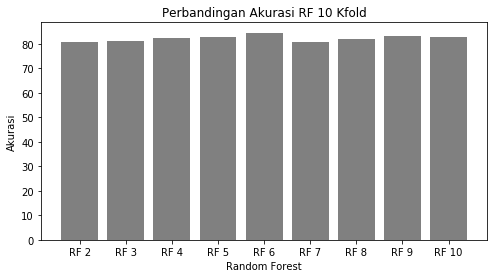

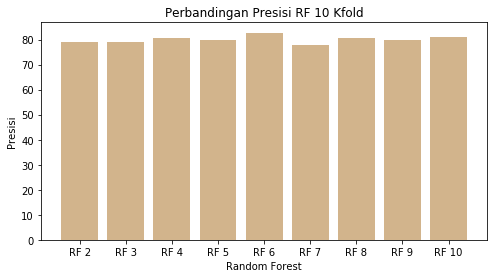

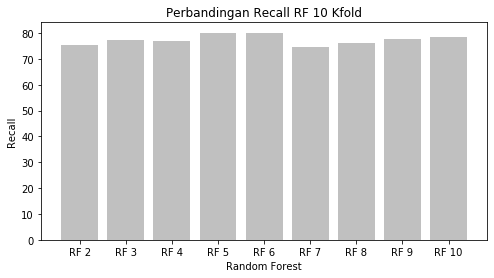

In [85]:
fig, ax = plt.subplots(1,figsize=(8,4))

x = ['RF 2','RF 3','RF 4','RF 5','RF 6','RF 7','RF 8','RF 9','RF 10']
npm = np.array([rfacu2,rfacu3,rfacu4,rfacu5,rfacu6,rfacu7,rfacu8,rfacu9,rfacu10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='grey')
plt.xlabel("Random Forest")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi RF 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['RF 2','RF 3','RF 4','RF 5','RF 6','RF 7','RF 8','RF 9','RF 10']
npm = np.array([rfpre2,rfpre3,rfpre4,rfpre5,rfpre6,rfpre7,rfpre8,rfpre9,rfpre10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='tan')
plt.xlabel("Random Forest")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi RF 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['RF 2','RF 3','RF 4','RF 5','RF 6','RF 7','RF 8','RF 9','RF 10']
npm = np.array([rfrec2,rfrec3,rfrec4,rfrec5,rfrec6,rfrec7,rfrec8,rfrec9,rfrec10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='silver')
plt.xlabel("Random Forest")
plt.ylabel("Recall")
plt.title("Perbandingan Recall RF 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

#### Decision Tree

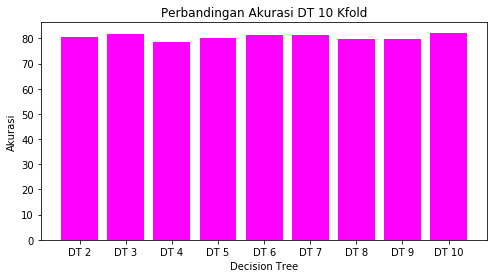

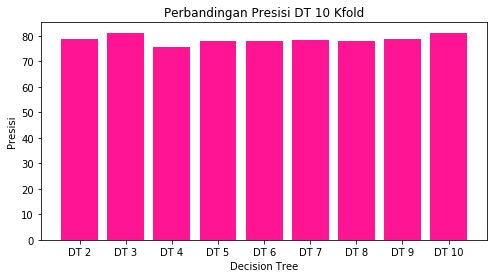

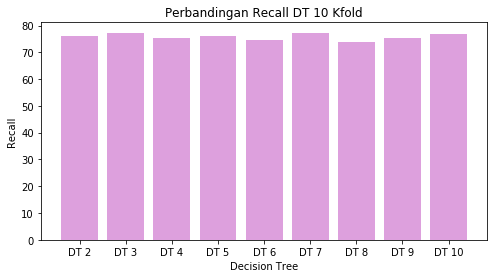

In [86]:
fig, ax = plt.subplots(1,figsize=(8,4))

x = ['DT 2','DT 3','DT 4','DT 5','DT 6','DT 7','DT 8','DT 9','DT 10']
npm = np.array([desacu2,desacu3,desacu4,desacu5,desacu6,desacu7,desacu8,desacu9,desacu10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='fuchsia')
plt.xlabel("Decision Tree")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi DT 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['DT 2','DT 3','DT 4','DT 5','DT 6','DT 7','DT 8','DT 9','DT 10']
npm = np.array([despre2,despre3,despre4,despre5,despre6,despre7,despre8,despre9,despre10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='deeppink')
plt.xlabel("Decision Tree")
plt.ylabel("Presisi")
plt.title("Perbandingan Presisi DT 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

fig, ax = plt.subplots(1,figsize=(8,4))

x = ['DT 2','DT 3','DT 4','DT 5','DT 6','DT 7','DT 8','DT 9','DT 10']
npm = np.array([desrec2,desrec3,desrec4,desrec5,desrec6,desrec7,desrec8,desrec9,desrec10])
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, npm, color='plum')
plt.xlabel("Decision Tree")
plt.ylabel("Recall")
plt.title("Perbandingan Recall DT 10 Kfold")
plt.xticks(x_pos, x)
plt.show()

In [14]:
meanLR = 
meanGB = 
meanRF = np.array([rfacu2,rfacu3,rfacu4,rfacu5,rfacu6,rfacu7,rfacu8,rfacu9,rfacu10]).mean()
meanDT = np.array([desacu2,desacu3,desacu4,desacu5,desacu6,desacu7,desacu8,desacu9,desacu10]).mean()
tes

80.65818417168508